In [19]:
%matplotlib inline

In [18]:
import tensorflow as tf
import tensorflow.contrib.slim as slim
import cv2
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
tf.app.flags.DEFINE_string(
    'dataset_dir', None, 'The directory where the dataset files are stored.')

In [3]:
tf.app.flags.DEFINE_string(
    'split_name', 'train', 'The name of the train/test split.')

In [6]:
# simulate tf.app.run()
# and parse the argvs
_ = tf.flags.FLAGS._parse_flags(
    ['--dataset_dir', '/home/mobile/data/synthtext/',])

In [8]:
FLAGS = tf.app.flags.FLAGS

if not FLAGS.dataset_dir:
    raise ValueError('You must supply the dataset directory with --dataset_dir')

## read dataset

In [25]:
import sys
sys.path.append('../datasets/')

In [26]:
import synthtext

In [12]:
synthtext_dataset = synthtext.get_split(FLAGS.split_name, FLAGS.dataset_dir)

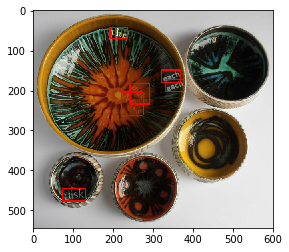

In [22]:
with tf.Graph().as_default():
    data_provider = slim.dataset_data_provider.DatasetDataProvider(
        synthtext_dataset, common_queue_capacity=32, common_queue_min=1)

    image, bbox, label = data_provider.get(['image', 'object/bbox', 'object/label'])

    with tf.Session() as sess:    
        with slim.queues.QueueRunners(sess):
            np_image, np_bboxes, np_label = sess.run([image, bbox, label])
            height, width, _ = np_image.shape
            for bbox in np_bboxes:
                y_min, x_min, y_max, x_max = bbox
                cv2.rectangle(np_image, 
                              (int(x_min*width), int(y_min*height)), 
                              (int(x_max*width), int(y_max*height)), 
                              (255, 0, 0), 2)
            plt.figure()
            plt.imshow(np_image)

## get ssd networks and its anchors

In [27]:
sys.path.append('../nets/')

In [28]:
import ssd_vgg_512

In [ ]:
'/home/mobile/data/synthtext/'